**In this notebook we Segment images of lemons and count the number of lemons in the image.**

First we bring in some common expected libraries to help us with the task.

In [0]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import skimage.io as sk
from google.colab.patches import cv2_imshow # as cv.imshow() doesn't work in jupyter noteebook

In [0]:
#observing few images of lemons
img1 = sk.imread("/content/drive/My Drive/lemons/lemons1.jpg", as_gray=True)
img2 = sk.imread("/content/drive/My Drive/lemons/lemons2.jpeg", as_gray= True)
img3 = sk.imread("/content/drive/My Drive/lemons/lemons3.jpg", as_gray=True)

#image courtesy : Google search

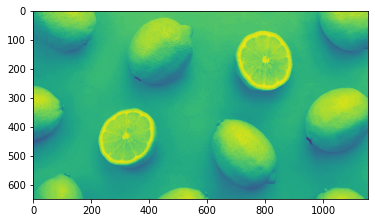

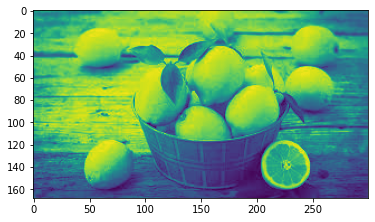

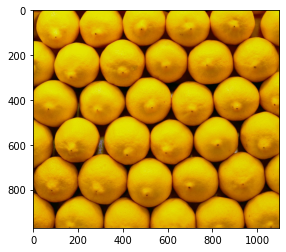

In [0]:
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

plt.imshow(img3)
plt.show()

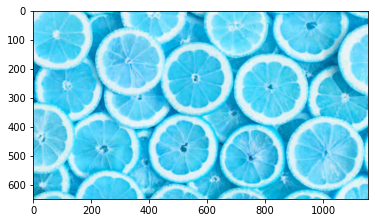

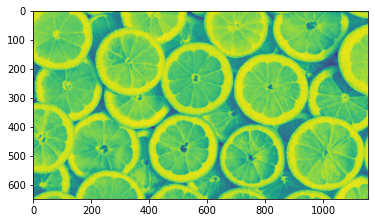

In [0]:
image = cv2.imread("/content/drive/My Drive/lemons/lemons4.jpg")
output = image.copy()
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()
plt.imshow(img)
plt.show()

**Observation :**
*   Lemons are having more-or-less elliptical shape.
*   Some are circular too.





**Next steps:** 
*   Hough transform can detect edges, circles and ellipses.
*   Skimage and Open CV have got Hough transform, which we can use to help us with the task.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


time taken =  0.26974916458129883


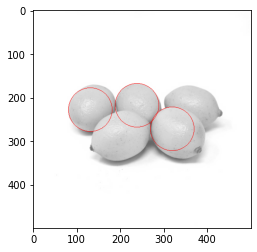

no of lemons =  3


In [0]:
import matplotlib.pyplot as plt
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
import skimage.transform
import time
from skimage import color
# Load picture and detect edges

fp = "/content/drive/My Drive/lemons/lemons6.jpg" #enter ur file path to the image here

image = sk.imread(fp, as_gray=True)

s = time.time()

image = skimage.transform.resize(image, (500, 500)) # standardising the sizes of all image to set hyperparameters
edges = canny(image, sigma = .5) # Canny gives us outlines and edges in an image

#list of possible radii of lemons wrt 500x500 image. Chosen arbitarily
hough_radii = np.arange(50, 201, 50)

hough_res = hough_circle(edges, hough_radii) #screening over our image and searching for a math with lemon's radius

#selecting most prominent circles out of many possibilities
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, min_xdistance=25, min_ydistance=25)

#again filtering out with minimum intensity also
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, min_xdistance=80, min_ydistance=80, threshold = .6 * max(accums), normalize = True)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1)
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (255, 0, 0)

e = time.time()
print("time taken = ", e - s)
ax.imshow(image, cmap=plt.cm.gray)
plt.show()
print("no of lemons = ", len(accums))

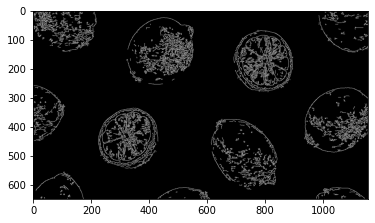

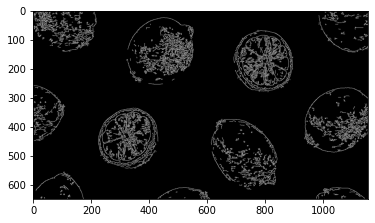

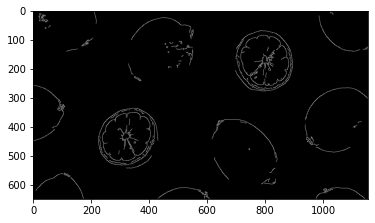

In [0]:
#fine tuning value of sigma (in canny filter) by hit and trial

from skimage.feature import canny
image = sk.imread("/content/drive/My Drive/lemons/lemons1.jpg", as_gray=True)
e1 = canny(image, sigma = .01)
plt.imshow(e1, cmap=plt.cm.gray)
plt.show()

e2 = canny(image, sigma=.1)
plt.imshow(e2, cmap=plt.cm.gray)
plt.show()

e3 = canny(image, sigma=1)
plt.imshow(e3, cmap=plt.cm.gray)
plt.show()


References:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghcircles/py_houghcircles.html

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html

https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

https://www.geeksforgeeks.org/circle-detection-using-opencv-python/

https://scikit-image.org/docs/dev/api/skimage.color.html

https://scikit-image.org/docs/dev/api/skimage.draw.html#skimage.draw.circle_perimeter

https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.hough_circle

https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny

